In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

In [2]:
X = data.drop('class', axis=1)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
y = data['class']
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [5]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [6]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [13]:
X_train = data[data['class'].isin(['byuing', 'main', 'doors', 'persons', 'lug_boot', 'safety'])]
y_train = data['class'].values  

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1382, 6), (1382,), (346, 6), (346,))

In [16]:
# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # 성별이 one-hot 인코딩 되어 있으면 categorical_crossentropy
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32)

loss, acc = model.evaluate(X_train, y_train, verbose=0)

# 최종 정확도 출력
print(f"Test Accuracy: {acc * 100:.2f}%")


ValueError: Data cardinality is ambiguous:
  x sizes: 0
  y sizes: 1728
Make sure all arrays contain the same number of samples.

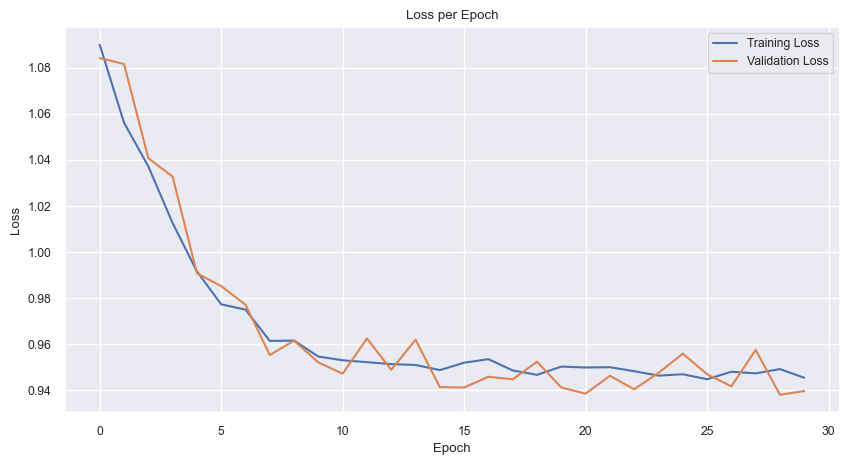

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()